<a href="https://colab.research.google.com/github/wdon021/From_Colab/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
# import scipy.misc as smp
from PIL import Image as im
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display

# circle

In [ ]:
# Test for circle function out of bound
# for i in range(333):
#   k = np.random.random_sample(size=2)
#   col_random = np.int(16*k[0])+6
#   row_random = np.int(16*k[1])+6
#   cr = 5
#   print("col_max{0}, col_min{1}, row_max{2}, row_min{3}".format(col_random+cr, col_random-cr, row_random+cr, row_random-cr))
#   if(((col_random+cr)>=28) | ((col_random-cr)<1)):
#     print("col_random is out of bound")
#   if(((row_random+cr)>=28) | ((row_random-cr)<1)):
#     print("row_random is out of bound")

In [167]:
def create_circle_random(size = 28, radius = 5, color = 255):
  k = np.random.random_sample(size=2)
  col_random = np.int(16*k[0])+6
  row_random = np.int(16*k[1])+6
  data = np.zeros((size, size), dtype = np.uint8)
  ci,cj = row_random, col_random
  cr = radius
  if(((col_random+cr)>=28) | ((col_random-cr)<1)):
    print("col_random is out of bound")
  if(((row_random+cr)>=28) | ((row_random-cr)<1)):
    print("row_random is out of bound")
  I,J = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
  # basic formula for a circle (x - a)**2 + (y - b)**2 = r**2
  # calculate the radius
  dist = np.sqrt((I-ci)**2 +(J-cj)**2)
  # Assign value of any for those points within radius
  data[np.where(dist<cr)] = color
  # img = im.fromarray(data)
  return data.flatten()

In [ ]:
def create_circle(size, rows, cols, radius, color):
  data = np.zeros((size, size), dtype = np.uint8)
  ci,cj = rows, cols
  cr = radius
  I,J = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
  # basic formula for a circle (x - a)**2 + (y - b)**2 = r**2
  # calculate the radius
  dist = np.sqrt((I-ci)**2 +(J-cj)**2)
  # Assign value of any for those points within radius
  data[np.where(dist<cr)] = color
  img = im.fromarray(data)
  return data, img

In [ ]:
plot1, img1 = create_circle(28, 15, 10, 5, 255)

In [ ]:
img1

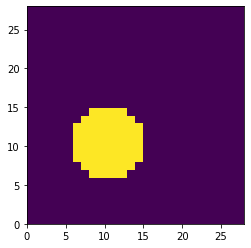

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(plot1)
ax.set_aspect('equal')
plt.show()

### Rectangle


In [ ]:
def rect(size, start_x, start_y, color):
  data = np.zeros((size, size), dtype = np.uint8)
  rows = start_x + 4 
  cols = start_y + 8
  data[start_x:rows, start_y:cols] = color
  img = im.fromarray(data)
  return data,img

In [117]:
def rect_x_y(height, width):
  k = np.random.random_sample(size=2)
  start_x = np.int(27*k[0])
  start_y = np.int(27*k[1])
  rows = start_x + height 
  cols = start_y + width
  return start_x, start_y, rows, cols


In [179]:
def rect_random(size, color):
  data = np.zeros((size, size), dtype = np.uint8)
  # x1, y1, x2, y2 = 0, 0, 0, 0
  x1, y1, x2, y2 = rect_x_y(4, 8)
  # print([x1, y1, x2, y2 ])
  while((x2 >=28)|(y2 >=28)):
    x1, y1, x2, y2 = rect_x_y(4, 8)
  # print([x1, y1, x2, y2 ])
  data[x1:x2, y1:y2] = color
  # img = im.fromarray(data)
  return data.flatten()
  # return img

In [131]:
rect_random(28, 255)

[3, 22, 7, 30]
[5, 17, 9, 25]


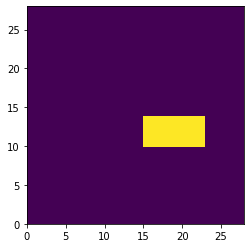

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(recData)
ax.set_aspect('equal')
plt.show()

### Triangles

In [ ]:
def triangle(size, start_x, start_y, color, diagonals = -1):
  data = np.zeros((size, size), dtype = np.uint8)
  # define a rectangle
  rows = start_x + 8 
  cols = start_y + 8
  data[start_x:rows, start_y:cols] = color
  # return lower triangle of rectangle
  data[start_x:rows, start_y:cols] = np.tril(data[start_x:rows, start_y:cols], diagonals)
  # return upper half triangle of rectangle
  # data[start_x:rows, start_y:cols] = np.triu(data[start_x:rows, start_y:cols], diagonals)
  img = im.fromarray(data)
  return data, img

In [171]:
def triang_ran(size, color, diagonals = -1):
  data = np.zeros((size, size), dtype = np.uint8)
  # define a rectangle
  start_x, start_y, rows, cols = rect_x_y(8, 8)
  # print([start_x, start_y, rows, cols])
  while((rows >=28)|(cols >=28)):
    start_x, start_y, rows, cols = rect_x_y(8, 8)
  # print([start_x, start_y, rows, cols])
  data[start_x:rows, start_y:cols] = color
  # return lower triangle of rectangle
  data[start_x:rows, start_y:cols] = np.tril(data[start_x:rows, start_y:cols], diagonals)
  # return upper half triangle of rectangle
  # data[start_x:rows, start_y:cols] = np.triu(data[start_x:rows, start_y:cols], diagonals)
  # img = im.fromarray(data)
  # return img
  return data.flatten()

In [ ]:
triaData, triaImg = triangle(28, 10, 12, 255)

In [ ]:
triaImg

### Random generate 

In [201]:
def random_shape():
  data = np.array([])
  name = ""
  prob = np.random.random_sample()
  if(prob<= 0.33333333333333333):
    data = create_circle_random(28, 5, 255)
    name = "C"
  elif((prob> 0.33333333333333333) & (prob<= 0.66666666666666666)):
    data = rect_random(28, 255)
    name = "R"
  else:
    data = triang_ran(28, 255)
    name = 'T'
  return data, name

In [208]:
shape_vect = []
shape_name = []

In [209]:
for i in range(10):
  s_vect, s_name = random_shape()
  shape_vect.append(s_vect)
  shape_name.append(s_name)

In [210]:
shape_name

['R', 'R', 'T', 'T', 'C', 'R', 'C', 'T', 'C', 'C']